<a href="https://colab.research.google.com/github/prasann-18/Mall-Customer-Segmentation-Data/blob/main/Mall_Customer_Segmentation_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers (4).csv


In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('Mall Customer Segmentation Data.zip')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.columns =(
   df.columns
   .str.strip()
   .str.lower()
   .str.replace(r"[()$]","",regex = True)
   .str.replace("-","_")
   .str.replace(" ","_")
)

In [ ]:
df.columns

Index(['customerid', 'gender', 'age', 'annual_income_k',
       'spending_score_1_100'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customerid            200 non-null    int64 
 1   gender                200 non-null    object
 2   age                   200 non-null    int64 
 3   annual_income_k       200 non-null    int64 
 4   spending_score_1_100  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,customerid,age,annual_income_k,spending_score_1_100
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# selecting features

x = df[['annual_income_k','spending_score_1_100']]
x.head()

,annual_income_k,spending_score_1_100
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
# since there is no label , the model can use only
#is distance between points

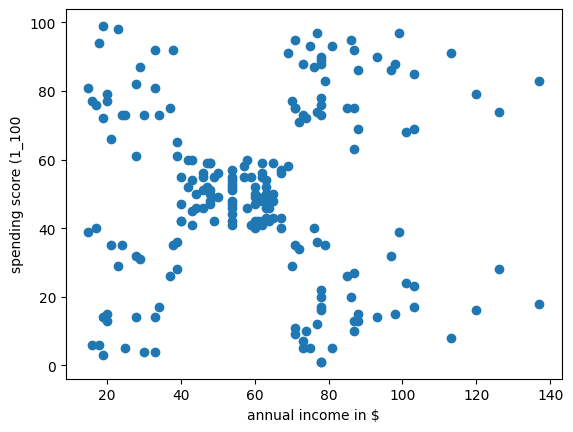

In [ ]:
# visualising raw data

import matplotlib.pyplot as plt

plt.figure()
plt.scatter(x["annual_income_k"],x['spending_score_1_100'])
plt.xlabel('annual income in $')
plt.ylabel('spending score (1_100')
plt.show()

In [ ]:
# k meanst tries to group points in the
# same group are close to each other

# from sklearn.cluster import KMeans

# kmeans = KMeans(n_clusters = 5, random_state=42)
# labels = kmeans.fit_predict(x)

#n_cluster , divide the ccustomer into 5 geoups

# fit (x) - looks at all data points in x, place

#assigns each point to center of assigned points in iteration
# repeats until stable
# for each data ponit retirns which cluster it belongs to
# represents them with numeric values

In [ ]:
# labels[:10]


In [ ]:
# df["cluster"] = labels
# df.head()

In [ ]:
# # visualize clusters

# plt.scatter(
#     x['annual_income_k'],
#     x['spending_score_1_100'],
#     c=labels

# )


# plt.xlabel('annual income in $')
# plt.ylabel('spending score (1_100')
# plt.title('customer segments')
# plt.show()

In [ ]:
# elbow method

# it helps to find how many groups to

In [ ]:
# it helps to find how many groups to use

from sklearn.cluster import KMeans

wcss = []

for k in range(1,11):
  kmeans = KMeans(n_clusters = k, random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)


#wcss - within cluster Sum of Squares
#Lower wcss - tightly cluusters
#higher wcss - messy clusters

# we will sore this for each kmeans
#each loop - new model - different number of clusters

#in each loop k incresses, wcss deecreases and improvement
# slows down after certain point

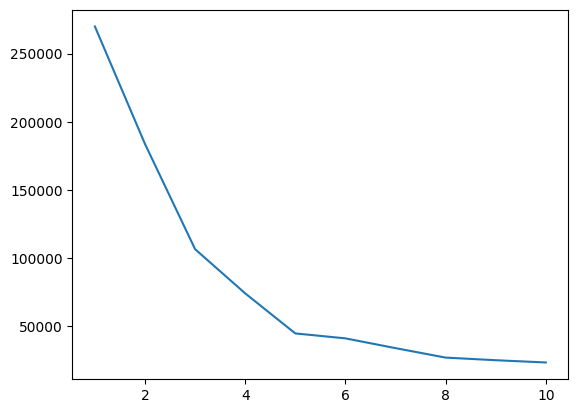

In [ ]:
plt.plot(range(1,11),wcss)

In [ ]:
kmeans = KMeans(n_clusters = 5, random_state=42)
labels = kmeans.fit_predict(x)


In [ ]:
labels[:10]

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2], dtype=int32)

In [ ]:
df["cluster"] = labels
df.head()

,customerid,gender,age,annual_income_k,spending_score_1_100,cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


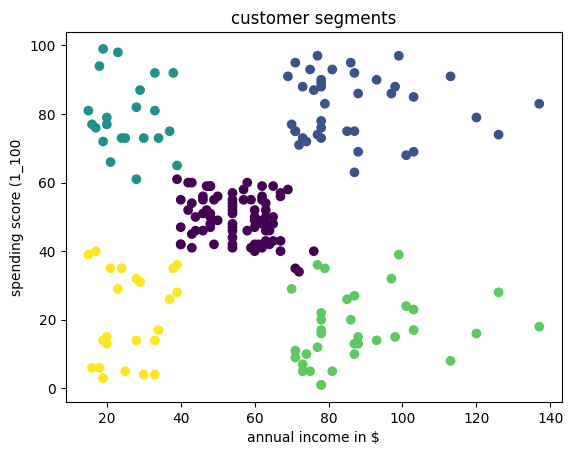

In [ ]:
plt.scatter(
    x['annual_income_k'],
    x['spending_score_1_100'],
    c=labels

)


plt.xlabel('annual income in $')
plt.ylabel('spending score (1_100')
plt.title('customer segments')
plt.show()

In [ ]:
# applying PCA here

# Principal Compound Analsis - PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)


#components = 2 = reducing data 2 dimnsions,
#information preserved mostly

# PCA are used when data any feature ,
# so pca compress infromation then we visulize it
# pca does not create clusters, it helps us see them

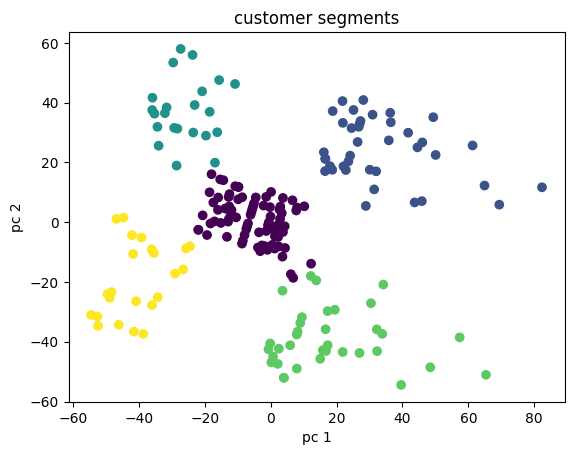

In [ ]:
# visualize clusters using PCA

plt.scatter(
    x_pca[:,0],
    x_pca[:,1],
    c=df['cluster']

)

plt.xlabel('pc 1')
plt.ylabel('pc 2')
plt.title('customer segments')
plt.show()


In [ ]:
df.groupby('cluster')[['annual_income_k','spending_score_1_100']].mean()

,annual_income_k,spending_score_1_100
cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


In [ ]:
df['segment'] = df['cluster'].map({
    0:'mid income - mid spend',
    1:'high income - high spend',
    2:'low income - high spend',
    3:'high income - low spend',
    4:'low income - low spend'
})

In [ ]:
df.head()

,customerid,gender,age,annual_income_k,spending_score_1_100,cluster,segment
0,1,Male,19,15,39,4,low income - low spend
1,2,Male,21,15,81,2,low income - high spend
2,3,Female,20,16,6,4,low income - low spend
3,4,Female,23,16,77,2,low income - high spend
4,5,Female,31,17,40,4,low income - low spend


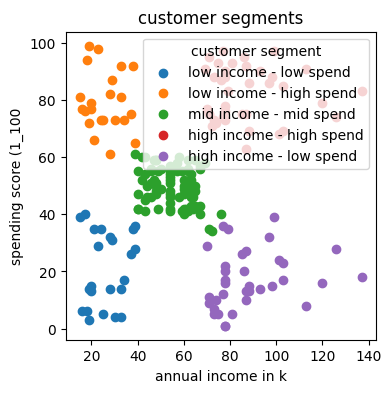

In [ ]:
plt.figure(figsize=(4,4))

for segment_name,cluster_id in df[['segment','cluster']].drop_duplicates().values:
  subset = df[df['cluster'] == cluster_id]

  plt.scatter(
      subset['annual_income_k'],
      subset['spending_score_1_100'],
      label = segment_name
  )

plt.xlabel('annual income in k')
plt.ylabel('spending score (1_100')
plt.title('customer segments')
plt.legend(title='customer segment')
plt.show()